# Autoencoder: MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
def get_mnist(one_hot_encoded=True, normalize_X=True, flatten_X=True):
    mnist = tf.keras.datasets.mnist

    (X_train, y_train),(X_test, y_test) = mnist.load_data()
    
    if normalize_X:
        X_train, X_test = X_train / 255.0, X_test / 255.0
        
    if flatten_X:
        X_train = X_train.reshape(-1, 784)
        X_test = X_test.reshape(-1, 784)
    
    if one_hot_encoded:
        ohe = OneHotEncoder(categories='auto')
        ohe.fit(y_train.reshape(-1, 1))
        
        y_train = ohe.transform(y_train.reshape(-1, 1)).toarray()
        y_test = ohe.transform(y_test.reshape(-1, 1)).toarray()
        
        return ((X_train, y_train),(X_test, y_test))
    return ((X_train, y_train),(X_test, y_test))

In [3]:
(X_train, y_train), (X_test, y_test) = get_mnist()

Initialize the paramters for layers of our autoencoder

In [4]:
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

Initialize the tensors for the weights and biases of encoder and decoder.

In [5]:
X = tf.placeholder("float", [None, n_input])

W_enc_h1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
W_enc_h2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
W_dec_h1 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1]))
W_dec_h2 = tf.Variable(tf.random_normal([n_hidden_1, n_input]))

b_enc_h1 = tf.Variable(tf.random_normal([n_hidden_1]))
b_enc_h2 = tf.Variable(tf.random_normal([n_hidden_2]))
b_dec_h1 = tf.Variable(tf.random_normal([n_hidden_1]))
b_dec_h2 = tf.Variable(tf.random_normal([n_input]))

Define the encoder and decoder layers

In [6]:
#Encoder
layer_1_enc = tf.nn.sigmoid(tf.add(tf.matmul(X, W_enc_h1), b_enc_h1))
layer_2_enc = tf.nn.sigmoid(tf.add(tf.matmul(layer_1_enc, W_enc_h2), b_enc_h2))

#Decoder
layer_1_dec = tf.nn.sigmoid(tf.add(tf.matmul(layer_2_enc, W_dec_h1), b_dec_h1))
layer_2_dec = tf.nn.sigmoid(tf.add(tf.matmul(layer_1_dec, W_dec_h2), b_dec_h2))

We will be using Mean Squared Error as a cost function for our model.

In [7]:
lr = 0.01

err = X - layer_2_dec
cost = tf.reduce_mean(err * err)

optimizer = tf.train.RMSPropOptimizer(lr).minimize(cost)

In [8]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

In [9]:
batch_size = 256
epochs = 50

We will be training in batches to avoid running out of memory.

In [10]:
cost_vals = []
print("Epoch\tCost")
print("------------------------------------")
for epoch in range(epochs):
    for start, end in zip(range(0, len(X_train), batch_size), range(batch_size, len(X_train), batch_size)):
        batch_x = X_train[start:end]
        
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_x})
    cost_vals.append(c)
    if (epoch+1)%5 == 0:
        print(epoch+1, "\t{0:.4f}".format(c))
print("------------------------------------")
        

Epoch	Cost
------------------------------------
5 	0.1261
10 	0.1089
15 	0.0965
20 	0.0897
25 	0.0879
30 	0.0821
35 	0.0846
40 	0.0810
45 	0.0786
50 	0.0803
------------------------------------


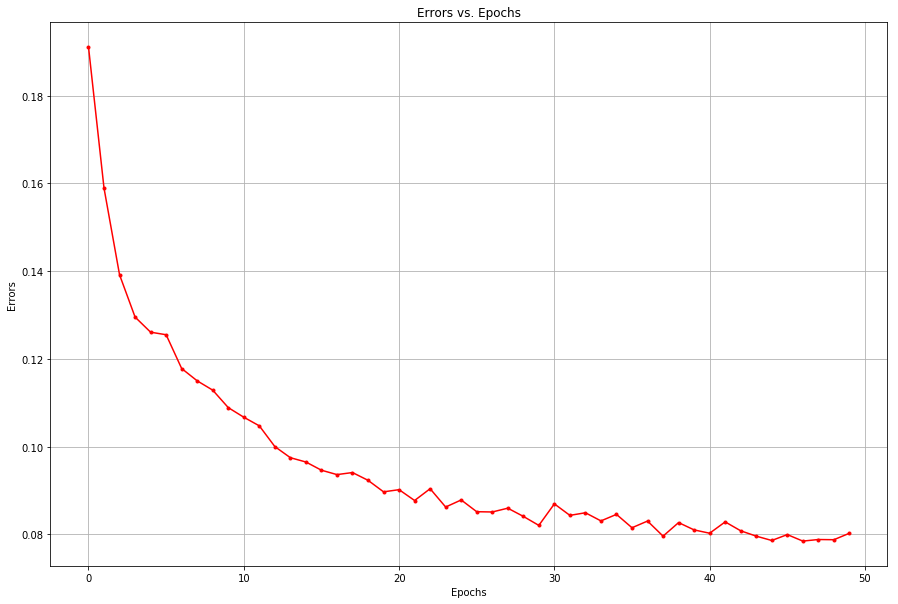

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(cost_vals, 'r.-')
plt.xlabel("Epochs")
plt.ylabel("Errors")
plt.title("Errors vs. Epochs")
plt.grid()
plt.show()

In [12]:
encode_decode = sess.run(layer_2_dec, feed_dict={X: X_test[:10]})

Lets have a look a test images and their reconstructed form.

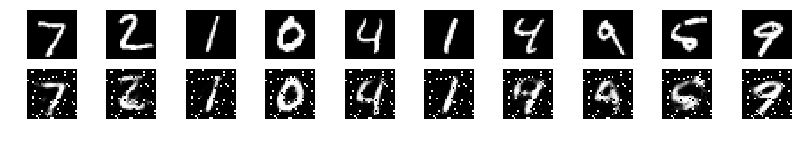

In [13]:
f, a = plt.subplots(2, 10, figsize=(14, 2))
for i in range(10):
    a[0][i].imshow(np.reshape(X_test[i], (28, 28)), cmap='gray')
    a[0][i].axis('off')
    
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)), cmap='gray')
    a[1][i].axis('off')
plt.show()